Populating the interactive namespace from numpy and matplotlib


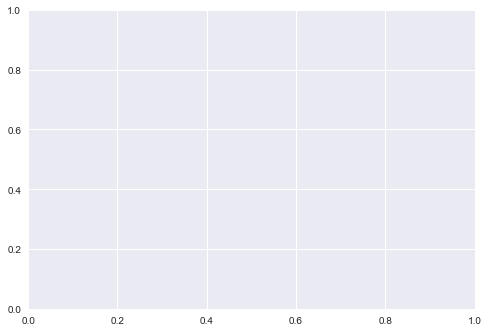

In [2]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from IPython.core.magic import register_cell_magic
import pandas as pd
import numpy as np
plt.ticklabel_format(style='plain', axis='y')

In [3]:
bechdelDataset = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1') 
bechdelDataset.head(10)

,Unnamed: 0,Unnamed: 0.1,id,imdb_id,Rating,Title,Year,Unnamed: 0_y,color,director_name,...,sum_col,director_total_sum,director_sum,director_percentages,writer_total_sum,writer_sum,writer_percentages,producer_total_sum,producer_sum,producer_percentages
0,0,6236,4609,2005374.0,3,"Frozen Ground, The",2013,2415.0,Color,Scott Walker,...,1,1.0,1,-1.0,1.0,1,-1.0,1,1,-1.0
1,1,5449,230,73540.0,3,Picnic at Hanging Rock,1975,NaN,NaN,Peter Weir,...,1,1.0,1,-1.0,1.0,1,-1.0,1,1,-1.0
2,2,5121,5574,96969.0,3,Born on the Fourth of July,1989,2833.0,Color,Oliver Stone,...,1,2.0,1,0.0,1.0,1,-1.0,1,1,-1.0
3,3,5122,7200,102138.0,3,JFK,1991,1265.0,Black and White,Oliver Stone,...,1,3.0,2,0.5,4.0,1,0.0,2,2,1.0
4,4,2182,7593,69895.0,3,"Crazies, The",1973,NaN,NaN,George A. Romero,...,1,3.0,3,1.0,1.0,1,-1.0,1,1,-1.0
5,5,1464,7725,2406566.0,3,Atomic Blonde,2017,NaN,NaN,David Leitch,...,1,1.0,1,-1.0,2.0,1,0.0,1,1,-1.0
6,6,2443,284,443455.0,3,Brand Upon The Brain!,2006,NaN,NaN,Guy Maddin,...,1,2.0,1,0.0,1.0,1,-1.0,1,1,-1.0
7,7,5476,6171,33928.0,3,Murder by Invitation,1941,NaN,NaN,Phil Rosen,...,1,1.0,1,-1.0,1.0,1,-1.0,1,1,-1.0
8,549,1242,3242,115856.0,3,When the Cat&#39;s Away,1996,4839.0,Color,C__©dric Klapisch,...,1,1.0,1,-1.0,1.0,1,-1.0,1,1,-1.0
9,8,3185,3980,1613750.0,0,Kon-Tiki,2012,NaN,NaN,Joachim R__nning,...,1,2.0,1,1.0,1.0,0,-1.0,1,0,-1.0


In [15]:
bechdelDataset['sum_col'] = pd.Series(data = np.ones(len(bechdelDataset)))
bechdelDataset = bechdelDataset.sort_values(['director_name', 'Year'])
uniqueDirectors = bechdelDataset['director_name'].unique()
for director in uniqueDirectors:
    if (pd.notnull(director) and director != ''):
       directorSet = bechdelDataset[bechdelDataset.director_name == director]
       cumSum = 0.0
       cumPasses = 0.0 
       prevFilm = None
       i = 0
       for movieTuple in directorSet.iterrows():
           indexLoc = movieTuple[0]
           if (i == 0):
              bechdelDataset.set_value(indexLoc, 'director_percentages', -1)
           else:
              cumSum += 1.0
              cumPasses += prevFilm['binary']
              directorPerc = cumPasses/cumSum
              bechdelDataset.set_value(indexLoc, 'director_percentages', directorPerc)
            
           prevFilm = movieTuple[1] 
           i += 1
        
bechdelDataset['director_percentages']               

805    -1.000000
1714   -1.000000
2821   -1.000000
5913   -1.000000
743    -1.000000
5060   -1.000000
1460   -1.000000
5068   -1.000000
241    -1.000000
103     0.000000
4467    0.000000
395     0.333333
1156   -1.000000
824     1.000000
5750   -1.000000
4003    1.000000
461     1.000000
3116    1.000000
24     -1.000000
2678    0.000000
5495   -1.000000
6822   -1.000000
3503   -1.000000
2800   -1.000000
5427   -1.000000
3805   -1.000000
3698   -1.000000
3704    1.000000
3673    0.500000
3711    0.333333
          ...   
6952    1.000000
5215   -1.000000
2867   -1.000000
94     -1.000000
3735    1.000000
3955   -1.000000
2638   -1.000000
5390   -1.000000
4424   -1.000000
3758   -1.000000
2392   -1.000000
2416    0.000000
5527    0.000000
4447    0.000000
1155   -1.000000
1335   -1.000000
381     1.000000
7306    1.000000
2019    1.000000
608    -1.000000
7326         NaN
7414         NaN
7416         NaN
7419         NaN
3110         NaN
7433         NaN
6330         NaN
7440         N

In [17]:
bechdelDataset = bechdelDataset.sort_values(['writer', 'Year'])
uniqueWriters = bechdelDataset['writer'].unique()
for writer in uniqueWriters:
    if (pd.notnull(writer) and writer != ''):
       writerSet = bechdelDataset[bechdelDataset.writer == writer]
       cumSum = 0.0
       cumPasses = 0.0 
       prevFilm = None
       i = 0
       for movieTuple in writerSet.iterrows():
           indexLoc = movieTuple[0]
           if (i == 0):
              bechdelDataset.set_value(indexLoc, 'writer_percentages', -1)
           else:
              cumSum += 1.0
              cumPasses += prevFilm['binary']
              writerPerc = cumPasses/cumSum
              bechdelDataset.set_value(indexLoc, 'writer_percentages', writerPerc)
            
           prevFilm = movieTuple[1] 
           i += 1
        
bechdelDataset['writer_percentages']       

3388   -1.000000
7223   -1.000000
3815    0.000000
1191    0.000000
2865   -1.000000
1714   -1.000000
686    -1.000000
5984   -1.000000
9      -1.000000
4090   -1.000000
6829   -1.000000
4009    1.000000
5913   -1.000000
743    -1.000000
1592   -1.000000
580     0.000000
4628    0.500000
1451    0.666667
657     0.500000
241    -1.000000
103     0.000000
4467    0.000000
1872   -1.000000
1875    1.000000
2309    1.000000
1877    1.000000
1156   -1.000000
824     1.000000
4990   -1.000000
1993   -1.000000
          ...   
358          NaN
290          NaN
750          NaN
353          NaN
5499         NaN
6364         NaN
3425         NaN
2112         NaN
2929         NaN
3733         NaN
6085         NaN
6655         NaN
5565         NaN
1795         NaN
857          NaN
4635         NaN
6419         NaN
7433    0.000000
7435    0.000000
6190         NaN
6330         NaN
7440    0.000000
2949         NaN
2607         NaN
786          NaN
3401         NaN
5186         NaN
7443    0.0000

In [20]:
bechdelDataset = bechdelDataset.sort_values(['producer', 'Year'])
uniqueProducers = bechdelDataset['producer'].unique()
for producer in uniqueProducers:
    if (pd.notnull(producer) and producer != ''):
       producerSet = bechdelDataset[bechdelDataset.producer == producer]
       cumSum = 0.0
       cumPasses = 0.0 
       prevFilm = None
       i = 0
       for movieTuple in producerSet.iterrows():
           indexLoc = movieTuple[0]
           if (i == 0):
              bechdelDataset.set_value(indexLoc, 'producer_percentages', -1)
           else:
              cumSum += 1.0
              cumPasses += prevFilm['binary']
              producerPerc = cumPasses/cumSum
              bechdelDataset.set_value(indexLoc, 'producer_percentages', producerPerc)
            
           prevFilm = movieTuple[1] 
           i += 1
        
bechdelDataset['producer_percentages']  

0      -1.00
1      -1.00
2      -1.00
3       1.00
4      -1.00
5      -1.00
6      -1.00
7      -1.00
549    -1.00
8      -1.00
9      -1.00
10     -1.00
11      1.00
12      1.00
13      1.00
14      0.75
15      0.60
16      0.50
17     -1.00
18     -1.00
19     -1.00
20      0.00
21     -1.00
22     -1.00
23      1.00
24     -1.00
25     -1.00
26     -1.00
27     -1.00
28     -1.00
        ... 
7416    0.00
7417    0.00
7418    0.00
7419    0.00
7420    0.00
7421    0.00
7422    0.00
7423    0.00
7424    0.00
7425    0.00
7426    0.00
7427    0.00
7428    0.00
7429    0.00
7430    0.00
7431    0.00
7432    0.00
7433    0.00
7434    0.00
7435    0.00
7436    0.00
7437    0.00
7438    0.00
7439    0.00
7440    0.00
7441    0.00
7442    0.00
7443    0.00
7444    0.00
7445    0.00
Name: producer_percentages, Length: 7446, dtype: float64

In [11]:
bechdelDataset['binary'].head(20)

319     0
3472    1
3546    0
5389    1
6711    1
5600    1
4786    0
3201    0
2025    0
2663    0
3412    1
5093    1
5065    1
6458    1
1496    1
2194    1
2435    1
2500    1
109     0
135     0
Name: binary, dtype: int64

In [31]:
#use this to construct pass percentages for each director/writer/producer 
#over their work in the dataset
from collections import defaultdict

def returnValue(x, totalValues, name):
    if (pd.notnull(x) and name != '' and pd.notnull(name)):
       return x/(1.0 * totalValues[name])
    else:
       return 0.0

def constructRecord(dataset, role):
    columnName = role
    totalValues = dataset[columnName].value_counts().to_dict()
    
    percentsList = []
    for i in range(len(dataset)):
        director_name = dataset.iloc[i][columnName]
        percVal = returnValue(dataset.iloc[i][columnName + "sum"], totalValues, director_name)
        percentsList.append(percVal)
        
    dataset[columnName + '%'] = pd.Series(percentsList)  
    return dataset


In [32]:
bechdelDataset = constructRecord(bechdelDataset.sort_values(['director_name', 'Year']), 'director_name')
#bechdelDataset = constructRecord(bechdelDataset, 'writer')
#bechdelDataset = constructRecord(bechdelDataset, 'producer')

In [33]:
bechdelDataset.head(40)

,Unnamed: 0,Unnamed: 0.1,id,imdb_id,Rating,Title,Year,Unnamed: 0_y,color,director_name,...,adjusted_box_office,Multigenre,director_name%,writer%,producer%,director_gender,producer_gender,writer_gender,director_namesum,director_sum
0,319,319,1973,31322.0,0,"Flying Deuces, The",1939,NaN,NaN,A. Edward Sutherland,...,0.000000e+00,Y,0.000000,0.666667,0.000000,M,M,M,0,0
1,3472,3472,5419,338467.0,3,High Roller: The Stu Ungar Story,2003,NaN,NaN,A.W. Vidmer,...,0.000000e+00,Y,1.000000,1.000000,1.000000,M,F,M,1,1
2,3546,3546,7027,328880.0,0,Brother Bear,2003,NaN,NaN,Aaron Blaise,...,6.721216e+07,Y,0.000000,0.000000,0.000000,M,M,M,0,0
3,5389,5389,3349,1886493.0,3,Catch .44,2011,NaN,NaN,Aaron Harvey,...,0.000000e+00,Y,1.000000,1.000000,1.000000,M,M,M,1,1
4,6711,6711,7007,3283556.0,3,Land Ho!,2014,NaN,NaN,Aaron Katz,...,7.392303e+05,Y,1.000000,1.000000,1.000000,M,F,M,1,1
5,5600,5600,4242,1525552.0,3,Apart,2011,NaN,NaN,Aaron Rottinghaus,...,3.052204e+03,Y,1.000000,1.000000,1.000000,M,F,M,1,1
6,4786,4786,2273,1194263.0,1,Get Low,2009,3549.0,Color,Aaron Schneider,...,2.049195e+07,Y,0.000000,0.000000,0.500000,M,M,M,0,0
7,3201,3201,6789,256692.0,1,Chori Chori Chupke Chupke,2001,NaN,NaN,Abbas Alibhai Burmawalla,...,0.000000e+00,Y,0.000000,0.000000,0.000000,M,M,M,0,0
8,2025,2025,3561,100234.0,1,Close-Up,1990,NaN,NaN,Abbas Kiarostami,...,0.000000e+00,Y,0.000000,0.333333,0.000000,M,M,M,0,0
9,2663,2663,1810,120265.0,0,Taste of Cherry,1997,NaN,NaN,Abbas Kiarostami,...,0.000000e+00,N,0.000000,0.333333,0.000000,M,M,M,0,0


In [ ]:
names = bechdelDataset['producer'].unique()
producerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        producerFirstNames.append(first[0])
        
#sorted ensures we don't lose our place
producerGivenNamesSet = sorted(list(set(producerFirstNames)))

In [ ]:
names = bechdelDataset['writer'].unique()
writerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        writerFirstNames.append(first[0])
        
writerGivenNamesSet = sorted(set(writerFirstNames))

In [ ]:
names = bechdelDataset['director_name'].unique()
directorNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        directorNames.append(first[0])
        
directorGivenNamesSet = sorted(set(directorNames))
print(len(directorGivenNamesSet))

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
bechdelDataset.head(10)

In [5]:
import requests
import json
import xmltodict

def requestGender(name, key):
     print(name)
     paramDict = {'name': name, 'key': key}
     response = requests.get('https://www.behindthename.com/api/lookup.php', paramDict)
     fileStr = {}
     if (response != None and response.status_code == 200):
        fileDict = xmltodict.parse(response.text)
        print(fileDict)
        if ('response' in fileDict.keys() and 'name_detail' in fileDict['response'].keys()):
           nameDetail = fileDict['response']['name_detail'] 
           if (type(nameDetail) is list):
               gender = fileDict['response']['name_detail'][0]['gender']      
           else:     
               gender = fileDict['response']['name_detail']['gender']
           print("success")
           return gender.upper()
     else:
        return "MFail"
     return "M"    

In [ ]:
requestGender("Christopher")

In [ ]:
from collections import defaultdict

namesValues = defaultdict(str)
for i in range(1285, len(producerGivenNamesSet)):
    print(i)
    name = producerGivenNamesSet[i]
    gender = requestGender(name)
    if (gender == "MFail"):
        break
    namesValues[producerGivenNamesSet[i]] = gender

In [ ]:
#namesDF = pd.DataFrame({"names": namesValues.keys(), "gender": namesValues.keys()})
#namesDF = pd.DataFrame(namesValues, index=[i for i in range(len(namesValues))])
#save dataframe to pandas for later, 1285
#namesDF.to_csv('nameGenders.csv')
values = []
for colum in namesDF.columns.values[0:1285]:
    value = namesDF.iloc[0][colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value)    
oldNamesDict = pd.DataFrame({"names": namesDF.columns.values[0:1285], "values": values})
oldNamesDict 

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1285, 1792)])
frames = [oldNamesDict, newNamesDict]
result = pd.concat(frames)

In [ ]:
result.to_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(1372, len(writerGivenNamesSet)):
    print(i)
    name = writerGivenNamesSet[i]
    gender = requestGender(name, 'co403533')
    if (gender == "MFail"):
        break
    namesValues[writerGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1372, 1372 + len(namesValues))])
newNamesDict.to_csv('writerNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(881, len(directorGivenNamesSet)):
    print(i)
    name = directorGivenNamesSet[i]
    gender = requestGender(name, 'ma042492')
    if (gender == "MFail"):
        break
    namesValues[directorGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(881, 881 + len(namesValues))])
newNamesDict.to_csv('directorNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
directorNames = pd.read_csv('directorNamesGender.csv', encoding='latin-1')
writerNames = pd.read_csv('writerNamesGender.csv', encoding='latin-1')
producerNames = pd.read_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
directorDict = defaultdict(str)
for i in range(len(directorNames)):
    firstName = directorNames.iloc[i]['names']
    gender = directorNames.iloc[i]['values']
    directorDict[firstName] = gender
        
writerDict = defaultdict(str)    
for i in range(len(writerNames)):
    firstName = writerNames.iloc[i]['names']
    gender = writerNames.iloc[i]['values']
    writerDict[firstName] = gender
    
producerDict = defaultdict(str)    
for i in range(len(producerNames)):
    firstName = producerNames.iloc[i]['names']
    gender = producerNames.iloc[i]['values']
    producerDict[firstName] = gender    

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['director_name']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'director_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'director_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['producer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'producer_gender', producerDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'producer_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['writer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'writer_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'writer_gender', 'M')

In [21]:
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [ ]:
bechdelDataset.head()

In [6]:
bechdelDataset['color'] = bechdelDataset['color'].fillna('')
bechdelDataset['director_name'] = bechdelDataset['director_name'].fillna('')
bechdelDataset['num_critic_for_reviews'] = bechdelDataset['num_critic_for_reviews'].fillna(0)
bechdelDataset['director_facebook_likes'] = bechdelDataset['director_facebook_likes'].fillna(0)
bechdelDataset['actor_3_facebook_likes'] = bechdelDataset['actor_3_facebook_likes'].fillna(0)
bechdelDataset['actor_2_name'] = bechdelDataset['actor_2_name'].fillna('')
bechdelDataset['actor_1_facebook_likes'] = bechdelDataset['actor_1_facebook_likes'].fillna(0)
bechdelDataset['actor_1_name'] = bechdelDataset['actor_1_name'].fillna('')
bechdelDataset['num_voted_users'] = bechdelDataset['num_voted_users'].fillna(0)
bechdelDataset['cast_total_facebook_likes'] = bechdelDataset['cast_total_facebook_likes'].fillna('')
bechdelDataset['actor_3_name'] = bechdelDataset['actor_3_name'].fillna('')
bechdelDataset['facenumber_in_poster'] = bechdelDataset['facenumber_in_poster'].fillna(0)
bechdelDataset['plot_keywords'] = bechdelDataset['plot_keywords'].fillna('')
bechdelDataset['movie_imdb_link'] = bechdelDataset['movie_imdb_link'].fillna('')
bechdelDataset['num_user_for_reviews'] = bechdelDataset['num_user_for_reviews'].fillna(0)
bechdelDataset['content_rating'] = bechdelDataset['content_rating'].fillna('')
bechdelDataset['actor_2_facebook_likes'] = bechdelDataset['actor_2_facebook_likes'].fillna(0)
bechdelDataset['aspect_ratio'] = bechdelDataset['aspect_ratio'].fillna(0)
bechdelDataset['movie_facebook_likes'] = bechdelDataset['movie_facebook_likes'].fillna(0)
bechdelDataset['writer'] = bechdelDataset['writer'].fillna('')
bechdelDataset['box_office'] = bechdelDataset['box_office'].fillna(0)
bechdelDataset['parental_rating'] = bechdelDataset['parental_rating'].fillna('')
bechdelDataset['production_company'] = bechdelDataset['production_company'].fillna('')
bechdelDataset['director_gender'] = bechdelDataset['director_gender'].fillna('M')
bechdelDataset['producer_gender'] = bechdelDataset['producer_gender'].fillna('M')
bechdelDataset['writer_gender'] = bechdelDataset['writer_gender'].fillna('M')

In [19]:
bechdelDataset['imdb_score'] = bechdelDataset['imdb_score'].fillna(0)
for i in range(len(bechdelDataset)):
    if (bechdelDataset.iloc[i]['binary'] == 'PASS'):
       bechdelDataset.set_value(i, 'binary', 1)
    else:
       bechdelDataset.set_value(i, 'binary', 0) 
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [4]:
#base accuracy for original file
import catboost
from operator import itemgetter
from catboost import Pool
from sklearn.model_selection import train_test_split

meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
meeting = meeting.fillna(0.0)
test_size = .2

train, test = train_test_split(meeting, test_size=test_size)

colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test','director_namesum','sum_col','director_total_sum','director_sum','writer_total_sum','writer_sum','producer_total_sum','producer_sum']]

X_train, y_train = train[colNames], train['binary']
model = catboost.CatBoostClassifier(iterations=20, learning_rate=.4, depth=15, l2_leaf_reg=4, calc_feature_importance=True, loss_function='Logloss')

i = 0
cat_features = []
for col in colNames:
    print(i, col)
    if (meeting[col].dtype == 'object' and (col != 'imdb_score' and col != 'budget' and col != 'gross' and col != 'director_percentages' and col != 'writer_percentages' and col != 'producer_percentages')):
       cat_features.append(i)
    i += 1
       

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
X_test, y_t = test[colNames], test['binary']
testPool = Pool(X_test, y_t, cat_features)
preds  = model.predict(testPool)

importances = model.feature_importances_
colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
importanceMatrix = sorted(colList, key=itemgetter(1))

0 color
1 director_name
2 num_critic_for_reviews
3 duration
4 director_facebook_likes
5 actor_3_facebook_likes
6 actor_2_name
7 actor_1_facebook_likes
8 gross
9 genres
10 actor_1_name
11 num_voted_users
12 cast_total_facebook_likes
13 actor_3_name
14 facenumber_in_poster
15 plot_keywords
16 movie_imdb_link
17 num_user_for_reviews
18 language
19 country
20 content_rating
21 budget
22 actor_2_facebook_likes
23 imdb_score
24 aspect_ratio
25 movie_facebook_likes
26 producer
27 writer
28 parental_rating
29 production_company
30 Multigenre
31 director_gender
32 producer_gender
33 writer_gender
34 director_percentages
35 writer_percentages
36 producer_percentages


In [5]:
from sklearn.metrics import accuracy_score

print(preds)
print(len(preds))
accuracy = accuracy_score(y_t, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[ 1.  1.  1. ...,  1.  0.  1.]
1490
Accuracy: 68.05%


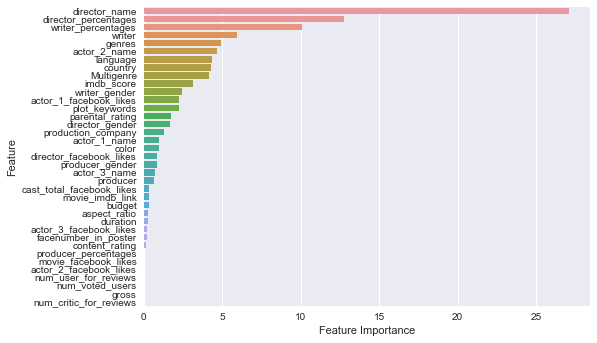

In [6]:
barX = [val[0] for val in importanceMatrix]
barY = [val[1] for val in importanceMatrix]

barX.reverse()
barY.reverse()

ax = sns.barplot(x=barY, y=barX, orient="h") 
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

In [7]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.49697885  0.50302115]
 [ 0.17270531  0.82729469]]


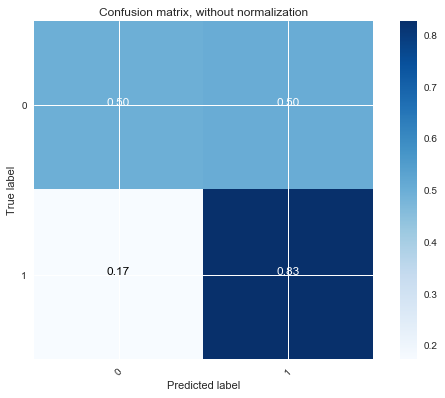

In [8]:
from sklearn.metrics import confusion_matrix

theMatrix = confusion_matrix(y_t, preds)
plot_confusion_matrix(theMatrix, classes=['0', '1'], normalize=True, title='Confusion matrix, without normalization')

In [38]:
#We have a really good classifier, and it seems the writer's past record is the most
#important factor in the classification

In [9]:
#Multiclass Regression
def getAccuracy(nIter, depth, lr, l2reg, multiLoss='MultiClass'):
    meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
    meeting = meeting.fillna(0.0)
    test_size = .2

    train, test = train_test_split(meeting, test_size=test_size)

    colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test','director_namesum','sum_col','director_total_sum','director_sum','writer_total_sum','writer_sum','producer_total_sum','producer_sum']]

    X_train, y_train = train[colNames], train['Rating']
    model = catboost.CatBoostClassifier(iterations=nIter, learning_rate=lr, depth=depth, l2_leaf_reg=l2reg, calc_feature_importance=True, loss_function=multiLoss)

    i = 0
    cat_features = []
    for col in colNames:
        if (meeting[col].dtype == 'object' and (col != 'imdb_score' and col != 'budget' and col != 'gross' and col != 'director_percentages' and col != 'writer_percentages' and col != 'producer_percentages')):
           cat_features.append(i)
        i += 1
       

    trainPool = Pool(X_train, y_train, cat_features)
    model.fit(trainPool)

    X_test, y_test = test[colNames], test['Rating']
    testPool = Pool(X_test, y_test, cat_features)
    preds_class  = model.predict(testPool)

    importances = model.feature_importances_
    colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
    theCols = sorted(colList, key=itemgetter(1))
    accuracy = accuracy_score(y_test, preds_class)
    
    return theCols, accuracy, y_test, preds_class


In [10]:
#lets tune iterations first
from sklearn.metrics import accuracy_score

for numIter in range(10, 20):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(numIter, 5, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Num iterations %d: Accuracy: %.2f%%" % (numIter, accuracy * 100.0))    


Num iterations 10: Accuracy: 44.74%
Num iterations 11: Accuracy: 36.32%
Num iterations 12: Accuracy: 44.03%


KeyboardInterrupt: 

In [ ]:
#lets pick 16

In [ ]:
#now lets tune depth
from sklearn.metrics import accuracy_score

for depth in range(5, 13, 1):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, depth, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Depth %d: Accuracy: %.2f%%" % (depth, accuracy * 100.0))    

In [ ]:
#lets pick 8 since the depth causes the training time to rise significantly
#and we dont get any significant boost in accuracy from high depths

In [13]:
#now we can tune the learning rate
from sklearn.metrics import accuracy_score

lr = 0.0
while lr <= 5.0:
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, lr, 1)[1]
        accuracySum = accuracySum/5.0    
    print ("Learning rate %d: Accuracy: %.2f%%" % (lr, accuracy * 100.0)) 
    lr += 1.0

Learning rate 0: Accuracy: 44.03%
Learning rate 1: Accuracy: 44.03%


KeyboardInterrupt: 

In [ ]:
#The learning rate is very important to tune and get right. LR here is .4, 
#indicating a small one is needed for very good accuracy.

In [47]:
#and finally lets tune the l2 reg 
from sklearn.metrics import accuracy_score

for l2reg in range(1, 10):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, .4, l2reg)[1]
        
    accuracy = accuracySum/5.0    
    print ("L2 Reg %d: Accuracy: %.2f%%" % (l2reg, accuracy * 100.0))    

L2 Reg 1: Accuracy: 79.57%
L2 Reg 2: Accuracy: 79.69%
L2 Reg 3: Accuracy: 79.68%
L2 Reg 4: Accuracy: 79.30%
L2 Reg 5: Accuracy: 78.91%
L2 Reg 6: Accuracy: 80.04%
L2 Reg 7: Accuracy: 78.75%
L2 Reg 8: Accuracy: 79.73%
L2 Reg 9: Accuracy: 78.85%


In [ ]:
#Lets just pick 6

In [ ]:
#and also the loss function we use
from sklearn.metrics import accuracy_score

accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 6)[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))   
    
accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4, 'MultiClassOneVsAll')[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass OnevAll: Accuracy: %.2f%%" % (accuracy * 100.0))       

In [ ]:
#since there is no real difference, we'll stick with the Multiclass indicator as
#the default.

In [15]:
#lets print out importance and a confusion matrix.
#And other stuff
importanceMatrix, accuracy, y_test, preds = getAccuracy(16, 8, .4, 6)
print("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))
print(importanceMatrix)

Multiclass: Accuracy: 61.61%
[('num_critic_for_reviews', 0.0), ('director_facebook_likes', 0.0), ('gross', 0.0), ('num_voted_users', 0.0), ('facenumber_in_poster', 0.0), ('num_user_for_reviews', 0.0), ('budget', 0.0), ('actor_2_facebook_likes', 0.0), ('aspect_ratio', 0.0), ('movie_facebook_likes', 0.0), ('producer_percentages', 0.0), ('content_rating', 0.167072931181439), ('actor_1_facebook_likes', 0.29581908195984935), ('parental_rating', 0.47194973839062754), ('imdb_score', 0.6069218855948063), ('cast_total_facebook_likes', 0.6622391163275282), ('color', 0.7233082162178888), ('country', 0.7329144843215297), ('actor_3_facebook_likes', 1.055037186814159), ('producer', 1.0680789818223597), ('production_company', 1.1652421496958811), ('producer_gender', 1.3044693368349913), ('Multigenre', 1.5267860709081862), ('actor_3_name', 2.3529920972242166), ('duration', 3.7571176766038947), ('actor_1_name', 3.8752010780635704), ('plot_keywords', 3.9264090376183094), ('language', 5.095058685707562),

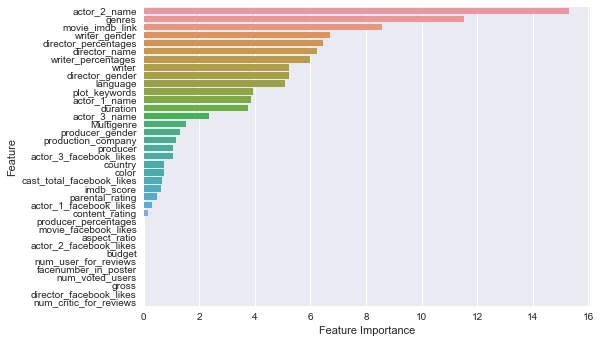

In [16]:
#bar graph importance matrix
barX = [val[0] for val in importanceMatrix]
barY = [val[1] for val in importanceMatrix]

barX.reverse()
barY.reverse()

ax = sns.barplot(x=barY, y=barX, orient="h") 
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

In [ ]:
#Looks like the percentages we used were the most important features for the trees we used in classification.

In [17]:
from sklearn.metrics import confusion_matrix

theMatrix = confusion_matrix(y_test, preds)
print(theMatrix)

[[ 21  13   0 112]
 [  2  52   0 265]
 [  2  16   0 130]
 [  3  29   0 845]]


Normalized confusion matrix
[[ 0.14383562  0.0890411   0.          0.76712329]
 [ 0.00626959  0.1630094   0.          0.830721  ]
 [ 0.01351351  0.10810811  0.          0.87837838]
 [ 0.00342075  0.03306727  0.          0.96351197]]


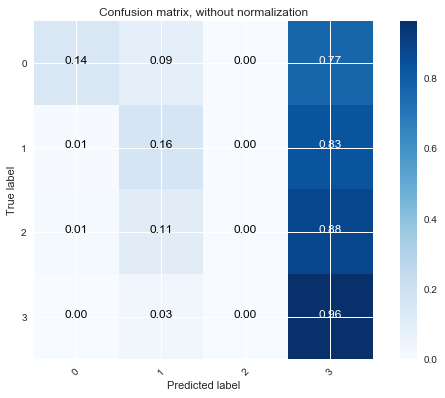

In [18]:
plot_confusion_matrix(theMatrix, classes=['0', '1','2','3'], normalize=True, title='Confusion matrix, without normalization')

In [ ]:
#Really good at detecting 1s and 3s here, with either no talking women or the true label.

In [30]:
#Binary classification problem: is 100% accuracy due to prevalence of FAILS. Its easy to predict 0s.
#Rating accuracy is much lower. This is a much harder problem to get right.
#Lets look at original bechdel dataset
bechdelClean = pd.read_csv('bechdel_clean.csv')
ids = []
for imdb_id in bechdelClean.imdb_id.values:
    ids.append(imdb_id)
     
reducedDataset = bechdelDataset[bechdelDataset.imdb_id.isin(ids)]
print(reducedDataset)

FileNotFoundError: File b'bechdel_clean.csv' does not exist

In [31]:
train, test = train_test_split(reducedDataset, test_size=test_size)

reducedDataset = reducedDataset.fillna('')
colNames = [col for col in reducedDataset.columns.values if col not in ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'test', 'clean_test', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['Rating']
model = catboost.CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

cat_features = []
i = 0
for col in colNames:
    if (reducedDataset[col].dtype == 'object' and col != 'imdb_score'):
       cat_features.append(i)
    i += 1

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
print(model)

X_test, y_test = test[colNames], test['Rating']
print(y_test.values)
print(len(y_test))
testPool = Pool(X_test, y_test, cat_features)
preds_class  = model.predict(testPool)


NameError: name 'reducedDataset' is not defined

In [32]:
from sklearn.metrics import accuracy_score

print(preds_class)
print(len(preds_class))
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[ 1.  1.  0. ...,  1.  1.  0.]
1490
Accuracy: 16.04%


In [7]:
#Boosting does very well for both types of classifiers. Now lets do revenue analysis for post 1990 
#American films. This will let us see how the Bechdel test affects revenue.
reducedSet = bechdelDataset[bechdelDataset.country == 'USA']
revenueHollywoodDataset = reducedSet[reducedSet.Year > 1989]
revenueHollywoodDataset.columns.values

NameError: name 'bechdelDataset' is not defined

In [5]:
passHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 1]
failHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 0]

204668208.47087815
239472432.6165006


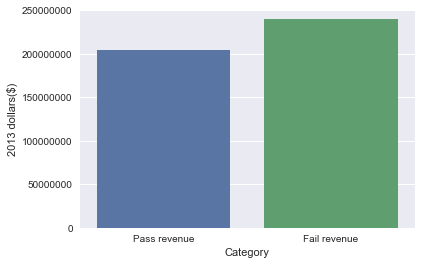

In [35]:
meanPassValue = 0.0
meanPassLen = 0.0
meanFailValue = 0.0
meanFailLen = 0.0
meanPasses = []
meanFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       meanPasses.append(revenue)

meanPassValue = pd.Series(meanPasses).mean()
meanPassStd = pd.Series(meanPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        meanFails.append(revenue)  
        
meanFailValue = pd.Series(meanFails).mean()     
meanFailStd = pd.Series(meanFails).std() 

print(meanPassValue)
print(meanFailValue)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[meanPassValue, meanFailValue], orient="v") 
ax.set_ylim(0, 250000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

319198088.28884685
306666574.88085055


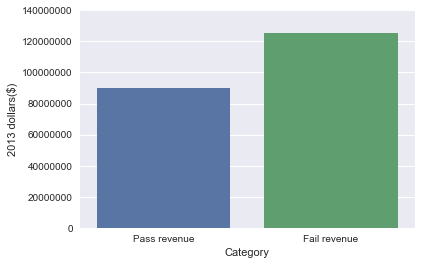

In [36]:
medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
medianPassStd = pd.Series(medianPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
medianFailStd = pd.Series(medianFails).std() 

print(medianPassStd)
print(medianFailStd)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.set_ylim(0, 140000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

In [60]:
#There is a significant difference between medians. Lets look by genre

In [1]:
#Cohen's d and percent variation
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

print(CohenEffectSize(pd.Series(meanFails), pd.Series(meanPasses)))

NameError: name 'pd' is not defined

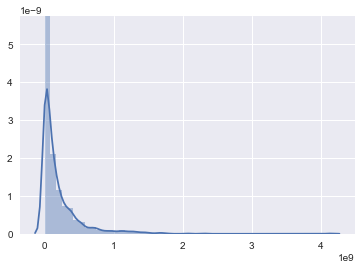

In [42]:
sns.distplot(meanPasses)

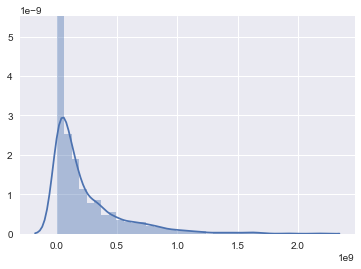

In [41]:
sns.distplot(meanFails)

In [ ]:
#this matches our observation of a low cohen's D with much overlap

In [43]:
coedTuples = zip(medianPasses, medianFails)
numTotal = 0.0
for pair in coedTuples:
    if (pair[0] > pair[1]):
        numTotal += 1.0

print(numTotal/len(medianPasses))

0.340036563071298


In [94]:
#reset indices to enable us to loop correctly over both with iloc
passHollywood = passHollywood.reset_index()
failHollywood = failHollywood.reset_index()

ValueError: cannot insert level_0, already exists

In [95]:
from collections import defaultdict
genreDict = defaultdict(list)
genres = list(passHollywood['genres'].values)
failGenres = list(failHollywood['genres'].values)

#passHollywood = passHollywood.reset_index()
#failHollywood = failHollywood.reset_index()

passGenreDict = defaultdict(list)
for a in range(len(passHollywood)):
    if (type(passHollywood.iloc[a]['genres']) is str):
      genres = passHollywood.iloc[a]['genres'].split('||')
      for genre in genres:
        passGenreDict[genre].append((passHollywood.iloc[a]['binary'], passHollywood.iloc[a]['adjusted_box_office']))
       
failGenreDict = defaultdict(list)
for a in range(len(failHollywood)):
    if (type(failHollywood.iloc[a]['genres']) is str):
      genres = failHollywood.iloc[a]['genres'].split('||')
      for genre in genres:
        failGenreDict[genre].append((failHollywood.iloc[a]['binary'], failHollywood.iloc[a]['adjusted_box_office']))
    
genreX = []
genreY = []

failGenreX = []
failGenreY = []

for genre in passGenreDict:
    genreX.append(genre)
    passBoxOffices = []
    genreLen = 0.0
    for value, box_office in passGenreDict[genre]:
        if (box_office != 0.0 and pd.notnull(box_office)):
            print(box_office)
            passBoxOffices.append(box_office)
            genreLen += 1.0                                  
    genreY.append(pd.Series(passBoxOffices).median())

for genre in failGenreDict:
    failGenreX.append(genre)
    failBoxOffices = []
    genreLen = 0.0
    for value, box_office in failGenreDict[genre]:
        if (box_office != 0.0 and pd.notnull(box_office)):
            failBoxOffices.append(box_office)
            genreLen += 1.0
                          
    failGenreY.append(pd.Series(failBoxOffices).median())

218621858.0
192479280.0
166686124.0
1310899333.0
695376938.0
4200140.0
951216821.0
398440153.0
159957554.0
83985017.0
1064998555.0
112571937.9
103245720.0
112571937.9
673093148.0
9867014.0
182224190.0
504280444.0
329625900.0
18320788.0
40939256.0
356775974.0
157176852.0
60521560.0
256598945.0
14115116.0
272103707.0
377659333.0
246352820.0
7166250.0
207374570.0
773823056.0
747083598.0
98000624.0
112534389.0
122577996.0
359451330.0
877712.0
1095737432.0
119465080.0
79583156.0
89725989.0
107077742.0
217457085.0
287945423.0
99350440.0
461043830.0
78921806.0
139809832.0
387219834.0
100893697.0
243295422.0
287642390.0
39417963.0
102893112.0
166022590.0
246710482.0
671328148.0
43082688.0
310586507.0
4127821329.0
65318456.0
164618257.0
457341188.0
51714087.0
523950625.0
700173833.0
15728382.0
202421319.0
542809882.0
87098469.0
187804484.0
12137487.0
122007881.0
358544918.0
6761310.0
293794874.0
80750526.0
109782424.0
1351351456.0
44955570.0
45144602.0
159471926.0
52172744.0
137877156.0
6800945

556393874.0
507155303.0
31119906.25
68150352.35
1101917814.0
156009768.0
1699628819.0
192352732.0
200584379.0
171175281.3
248413436.0
797947364.0
525920612.0
311435501.0
1269661302.0
917044606.0
463213837.0
629766567.0
218583053.0
407581771.0
22993718.1
270087.4001
1579663150.0
761064149.0
841129889.0
849253947.0
9785932.297
730867008.0
63117602.0
859713054.0
128522708.8
514964647.0
672528166.0
803480829.0
419563625.0
123467788.0
760236850.0
391365712.0
1397600228.0
375937364.0
1338831390.0
366856260.0
1223823.813
115536094.5
10379429.19
160551429.4
160551429.4
160551429.4
268924464.2
282814459.9
256280129.2
501009715.1
100617375.2
12693579.01
158345847.6
278503749.0
351591717.5
252547987.4
155482691.5
1146901616.0
747083598.0
507660658.0
287642390.0
10415832.0
246710482.0
606123960.0
457341188.0
87098469.0
145545224.0
8830921.0
619581404.0
31119906.25
1237662.367
72474576.0
334373.3985
200584379.0
89395381.98
171175281.3
29287680.0
60346437.0
60346437.0
361493035.0
525920612.0
3949719

In [96]:
#scenarios
genres = []
scenarios = []
revenues = []
genreX.sort()
failGenreX.sort()

for i in range(len(genreX)):
   genres.append(genreX[i])
   if (i >= len(failGenreX)):
       genres.append(genreX[i])
   else:
       genres.append(failGenreX[i])
        
   scenarios.append("pass")
   scenarios.append("fail")
    
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   revenues.append(genreY[i])

   if (i >= len(failGenreY)):
      revenues.append(0.0)  
   else:     
      if (pd.isnull(failGenreY[i])):
         failGenreY[i] = 0.0  
      revenues.append(failGenreY[i])

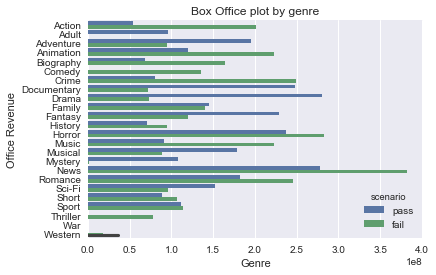

In [97]:
theData = pd.DataFrame({"genre": genres, "scenario": scenarios, "revenue": revenues}) 
    
ax = sns.barplot(x="revenue", y="genre", hue='scenario', data=theData, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office plot by genre")

In [77]:
for genre in passGenreDict:
    genreX.append(genre)                              
    genreY.append(len(passGenreDict[genre]))

for genre in failGenreDict:
    failGenreX.append(genre)                 
    failGenreY.append(len(failGenreDict[genre]))

In [87]:
genres = []
scenarios = []
revenues = []
genreX.sort()
failGenreX.sort()

for i in range(len(genreX)):
   genres.append(genreX[i])
   if (i >= len(failGenreX)):
       genres.append(genreX[i])
   else:
       genres.append(failGenreX[i])
        
   scenarios.append("pass")
   scenarios.append("fail")
   
   yPass = 0.0
   yFail = 0.0
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   
   yPass = genreY[i]
   if (i < len(failGenreY) and pd.notnull(failGenreY[i])):
       yFail = failGenreY[i]
        
   #add some fudge to avoid division by zero errors     
   yTotal = yPass + yFail + .00001    
   revenues.append(yPass/yTotal)
   revenues.append(yFail/yTotal)

In [88]:
print(genreX)
print(failGenreX)

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [73]:
print(theData)

           genre   revenue scenario
0          Drama  0.212425     pass
1         Action  0.787575     fail
2         Horror  0.503499     pass
3          Crime  0.496501     fail
4         Sci-Fi  0.466290     pass
5        Fantasy  0.533710     fail
6       Thriller  0.422026     pass
7         Sci-Fi  0.577974     fail
8         Comedy  0.333372     pass
9       Thriller  0.666628     fail
10   Documentary  0.000384     pass
11     Adventure  0.999616     fail
12       Romance  0.528741     pass
13         Drama  0.471259     fail
14        Family  0.771651     pass
15        Horror  0.228349     fail
16     Animation  0.667047     pass
17       Mystery  0.332953     fail
18       Musical  0.547325     pass
19        Comedy  0.452675     fail
20       Fantasy  0.708037     pass
21       Romance  0.291963     fail
22         Music  0.199271     pass
23        Family  0.800729     fail
24        Action  0.515261     pass
25       Western  0.484739     fail
26         Crime  0.506684  

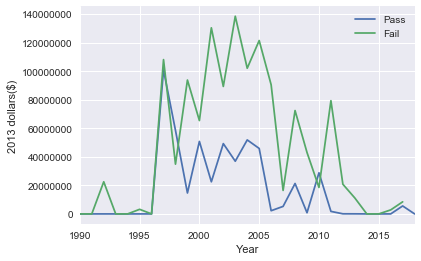

In [49]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

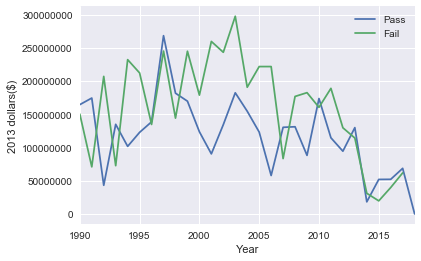

In [59]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].mean().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].mean().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

In [ ]:
#Hmm the dips in the data seem interesting. Otherwise the trend is for Fail to be much higher.

In [ ]:
#Plot 4: median vs mean box office revenue
#Gaps are higher for median box office revenue

In [6]:
from collections import defaultdict
#Analysis of genre trends for ones where it matters
#which genres will we look at: Adventure, Sci-Fi, Drama, Fantasy, Musical
genreDict = defaultdict(list)
for i in range(len(revenueHollywoodDataset)):
    print(i)
    if (type(revenueHollywoodDataset.iloc[i]['genres']) is str):
      genres = revenueHollywoodDataset.iloc[i]['genres'].split('||')
      for genre in genres:
        genreDict[genre].append(revenueHollywoodDataset.iloc[i]['binary'])

NameError: name 'revenueHollywoodDataset' is not defined

In [4]:
genreX = []
genreY = []
genreZ = []
for genre in genreDict:
    genreX.append(genre)
    passNum = 0.0
    genreLen = len(genreDict[genre])
    for word in genreDict[genre]:
        if (word == 1):
            passNum += 1.0
    genreY.append(passNum/(1.0 * genreLen))
    genreZ.append(genreLen)
    

NameError: name 'genreDict' is not defined

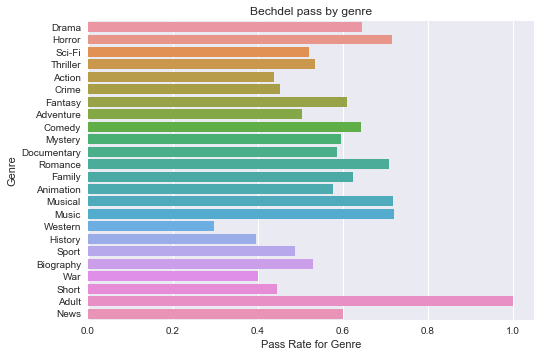

In [45]:
genreDataset = {'genre': genreX, 'pass rate': genreY, "num films": genreZ}
ax = sns.barplot(x="pass rate", y="genre", data=genreDataset, orient="h")
ax.set_xlabel("Pass Rate for Genre")
ax.set_ylabel("Genre")
ax.set_title("Bechdel pass by genre")

In [3]:
print([(genreX[i], genreZ[i]) for i in range(len(genreX))])

NameError: name 'genreX' is not defined

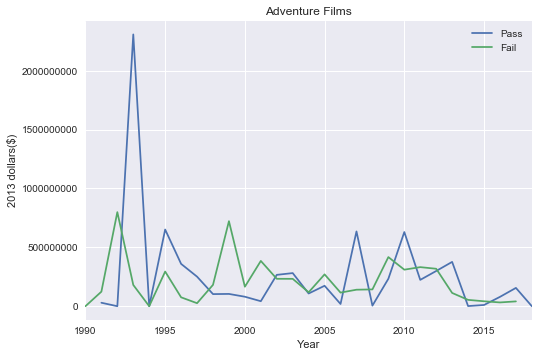

In [20]:
#Adventure, Sci-Fi, Drama, Fantasy, Musical
passHollywood = passHollywood.fillna('')
failHollywood = failHollywood.fillna('')
ax = passHollywood[passHollywood.genres.str.contains("Adventure")].groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood[failHollywood.genres.str.contains("Adventure")].groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_title('Adventure Films')
ax.legend(['Pass', 'Fail'])

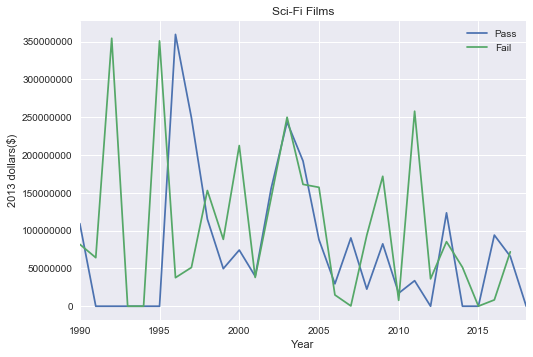

In [17]:
passHollywood = passHollywood.fillna('')
failHollywood = failHollywood.fillna('')
ax = passHollywood[passHollywood.genres.str.contains("Sci-Fi")].groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood[failHollywood.genres.str.contains("Sci-Fi")].groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_title('Sci-Fi Films')
ax.legend(['Pass', 'Fail'])

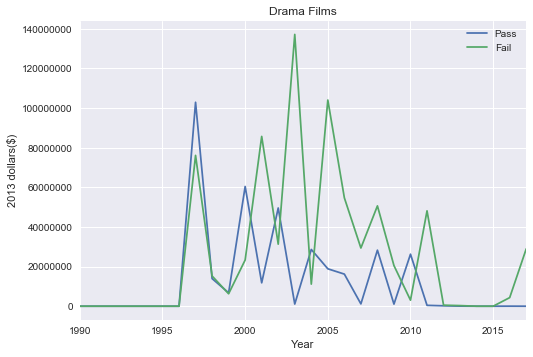

In [16]:
passHollywood = passHollywood.fillna('')
failHollywood = failHollywood.fillna('')
ax = passHollywood[passHollywood.genres.str.contains("Drama")].groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood[failHollywood.genres.str.contains("Drama")].groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_title('Drama Films')
ax.legend(['Pass', 'Fail'])

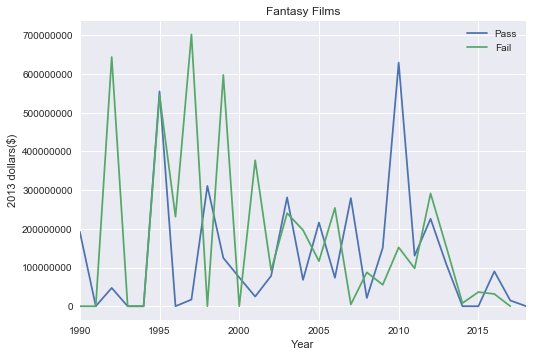

In [15]:
passHollywood = passHollywood.fillna('')
failHollywood = failHollywood.fillna('')
ax = passHollywood[passHollywood.genres.str.contains("Fantasy")].groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood[failHollywood.genres.str.contains("Fantasy")].groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_title('Fantasy Films')
ax.legend(['Pass', 'Fail'])

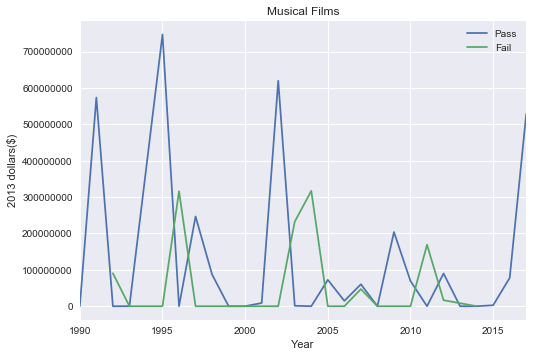

In [14]:
passHollywood = passHollywood.fillna('')
failHollywood = failHollywood.fillna('')
ax = passHollywood[passHollywood.genres.str.contains("Musical")].groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood[failHollywood.genres.str.contains("Musical")].groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_title('Musical Films')
ax.legend(['Pass', 'Fail'])

101176050.83372493
97391135.85819666


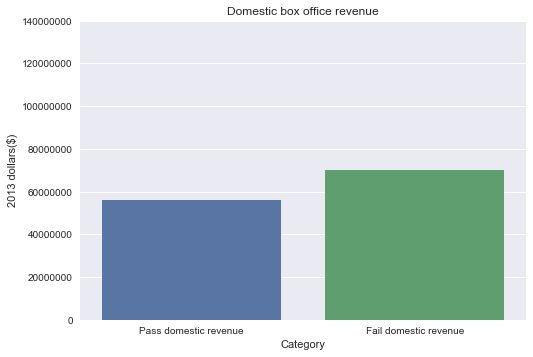

In [52]:
#International and domestic splits
medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []


for revenue in passHollywood['domgross_2013$'].values:
    if (revenue != '' and int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
medianPassStd = pd.Series(medianPasses).std()    
for revenue in failHollywood['domgross_2013$'].values:
    if (revenue != '' and int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
medianFailStd = pd.Series(medianFails).std() 

print(medianPassStd)
print(medianFailStd)
    
ax = sns.barplot(x=["Pass domestic revenue", "Fail domestic revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.set_ylim(0, 140000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')
ax.set_title("Domestic box office revenue")

In [56]:
CohenEffectSize(np.array(medianPasses), np.array(medianFails))

-0.094142942748692782

264558465.63004753
239291583.1723776


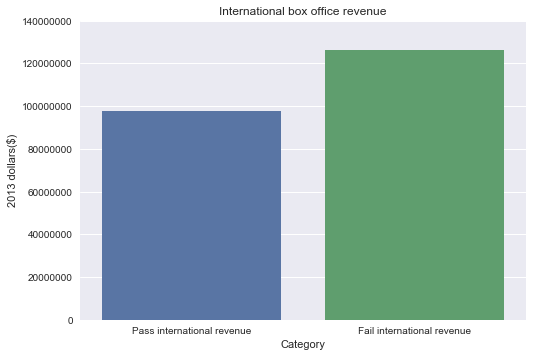

In [57]:
medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []


for revenue in passHollywood['intgross_2013$'].values:
    if (revenue != '' and int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
medianPassStd = pd.Series(medianPasses).std()    
for revenue in failHollywood['intgross_2013$'].values:
    if (revenue != '' and int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
medianFailStd = pd.Series(medianFails).std() 

print(medianPassStd)
print(medianFailStd)
    
ax = sns.barplot(x=["Pass international revenue", "Fail international revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.set_ylim(0, 140000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')
ax.set_title("International box office revenue")

In [58]:
CohenEffectSize(np.array(medianPasses), np.array(medianFails))

-0.098265845584699238

/Users/manav95/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


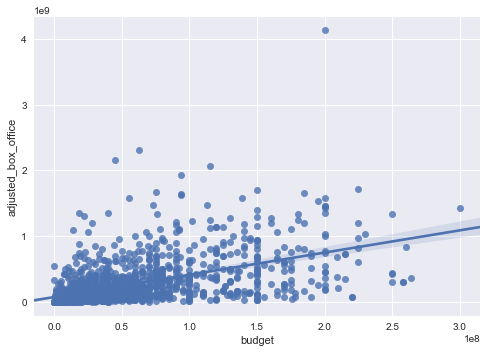

In [30]:
#How it relates to the budget
budgetComparisonSet = revenueHollywoodDataset[revenueHollywoodDataset.budget != 0][revenueHollywoodDataset.budget != 0.0]
budgetComparisonSet = budgetComparisonSet[budgetComparisonSet.adjusted_box_office != 0][budgetComparisonSet.adjusted_box_office != 0.0]
ax = sns.regplot(x="budget", y="adjusted_box_office", data=budgetComparisonSet)

In [51]:
#Hypothesis test for a genre thrown in as well
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

advIndex = genreDataset['genre'].index('Adventure')
adventurePassRate, adventureLength = genreDataset['pass rate'][advIndex], genreDataset['num films'][advIndex]

actionIndex = genreDataset['genre'].index('Action')
actionPassRate, actionLength = genreDataset['pass rate'][actionIndex], genreDataset['num films'][actionIndex]

stat, pval = proportions_ztest(np.array([adventureLength*adventurePassRate, actionLength*actionPassRate]), np.array([adventureLength, actionLength]))
print('{0:0.3f}'.format(pval))

0.016


In [ ]:
#There exists a significant difference between action and adventure pass rates.